# Session 29
Aug 2, 2021

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
print(type(iris))

<class 'sklearn.utils.Bunch'>


In [5]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [9]:
X, y = iris.data, iris.target
print(X.shape, y.shape)

(150, 4) (150,)


In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
plt.style.use('seaborn-dark')

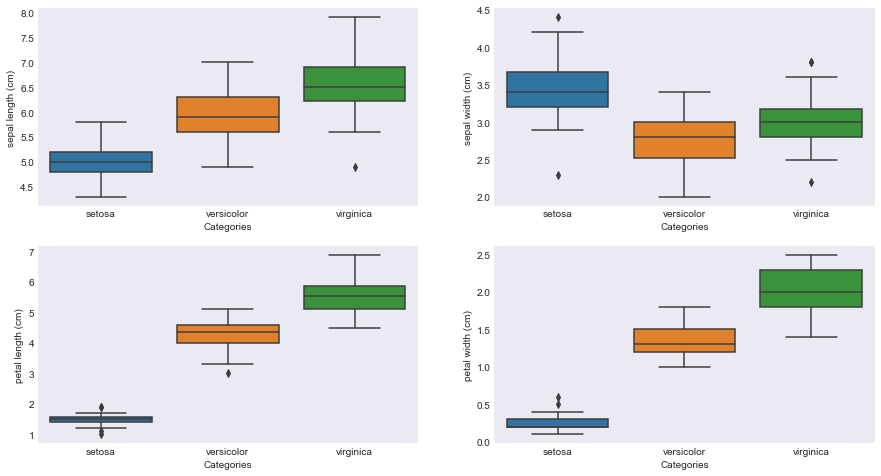

In [26]:
plt.figure(figsize=(15,8))

for i in range(4):
    plt.subplot(2,2, i+1)
    sns.boxplot(x=y, y=X[:,i])
    plt.xticks([0,1,2], labels=iris.target_names)
    plt.ylabel(iris.feature_names[i])
    plt.xlabel("Categories")
plt.show()


In [31]:
## custom model
def predict(x):
    # best feature: petal width
    feature = x[:,3]
    y = np.zeros(x.shape[0], dtype='int32')
    y[feature<1] = 0
    y[ (feature>=1) & (feature<1.75)] = 1
    y[ feature>=1.75 ] = 2
    return y


In [33]:
ypred = predict(X)

In [34]:
## accuracy
(ypred == y).mean()

0.96

In [36]:
# count of misclassified samples
y.shape[0] - (ypred == y).sum()

6

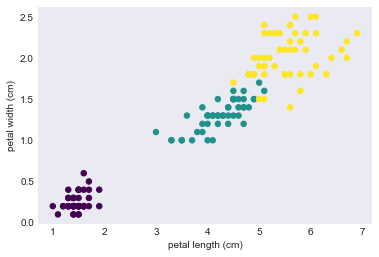

In [41]:
## BIVARIATE ANALYSIS: still there is overlapping between versicolor flowers and virginica flowers
plt.scatter(x= X[:,2], y=X[:,3], c=y, s=30, cmap = plt.cm.viridis) 
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

In [42]:
## feature: discrete, y-> discrete
# compute weight of evidence and information value

## Hyperparamter tuning

In [45]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [77]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [10, 100, 1], 
    'max_iter': [500, 1000]
}
model = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=500), param_grid, cv=5)

In [79]:
model.fit(X, y)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500, solver='liblinear'),
             param_grid={'C': [10, 100, 1], 'max_iter': [500, 1000],
                         'penalty': ['l1', 'l2']})

In [80]:
model.best_estimator_

LogisticRegression(C=10, max_iter=500, penalty='l1', solver='liblinear')

In [82]:
model.best_params_

{'C': 10, 'max_iter': 500, 'penalty': 'l1'}

In [83]:
pred = model.predict(X)

In [84]:
model.score(X, y)

0.98

In [87]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [1, 100, 10, 1000, 0.1],
    'max_iter': [500, 1000, 1500, 700, 800]
}

In [89]:
model = RandomizedSearchCV(LogisticRegression(solver='liblinear'), param_grid, n_iter=5, cv=5)

In [90]:
model.fit(X,y)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
                   n_iter=5,
                   param_distributions={'C': [1, 100, 10, 1000, 0.1],
                                        'max_iter': [500, 1000, 1500, 700, 800],
                                        'penalty': ['l1', 'l2']})

In [91]:
model.best_estimator_

LogisticRegression(C=10, max_iter=1000, penalty='l1', solver='liblinear')